In [1]:
import os
os.chdir("../")
os.getcwd()

'/home/Aishu/dl-model-extraction'

In [2]:
from attacker.query import *
from attacker.utils import *
from victim.__init__ import *

set_seed(42)

# Query victim model & Train attacker model

In [ ]:
# get dataset in dataloader
trainloader, testloader, outputs = get_dataloader(config["victim"]["data"])
# initialize attacker model
model = get_model(config["attacker"], outputs)
# train attacker model
_ = training(model, trainloader, testloader)

save_visualize(None, _,'title' )

In [ ]:
# get dataset in dataloader
trainloader, testloader, outputs = get_dataloader(config["victim"]["data"])

# query & save test data
querytestloader = query_victim(config["victim"], outputs, testloader, len(testloader.dataset), train=False)

# query train data
querytrainloader = query_victim(config["victim"], outputs, trainloader, config["query_size"], q_type=config["query_type"])

# initialize attacker model
attacker = get_model(config["attacker"], outputs)

# train attacker model
attacker_result = training(attacker, querytrainloader, querytestloader)

# save & visualize model inference
title = f'Trial-A_{config["attacker"]}_{config["victim"]["model_name"]}_{config["victim"]["data"]}{config["query_type"]}_{config["query_size"]}'
percent = save_visualize(attacker, attacker_result,title )
results_dict={"Victim":config["victim"]["model_name"],
                "Dataset":config["victim"]["data"],
                "QueryType": config["query_type"],
                "QuerySize": config["query_size"],
                "Queried Output": 'Labels',
                "Attacker": config["attacker"],
                "Train Loss": percent[0],
                "Train Accuracy": percent[1],
                "Test Loss": percent[2],
                "Test Accuracy": percent[3]}
print(results_dict)

# Parameters

In [3]:
parameters = {
        "query_size": [10000, 20000, 30000, 40000, 50000],
        "query_type": ['coreset','random'],
        "victim":[{"data": CIFAR_100, "model_name": RESNET50 }],
        "attacker":[RESNET34]
}

# Investigations

config={'batch_size': 500, 'learning_rate': 0.008, 'lr_cycles': 2, 'lr_steps': 1000, 'base_lr': 1e-05, 'max_lr': 0.1, 'query_size': 50000, 'query_type': 'coreset', 'victim': {'data': 'cifar_10', 'model_name': 'resnet50'}, 'attacker': 'resnet34'}

parameters={'query_size': [10000, 20000, 30000, 40000, 50000], 'query_type': ['coreset', 'random'], 'victim': [{'data': 'cifar100', 'model_name': 'resnet50'}], 'attacker': ['resnet34']}

---------------------------------------------------------------------------
Files already downloaded and verified
Files already downloaded and verified
Loading queried cifar100 dataset with resnet50 victim
    - input:10000 queried:10000
Sample using None with query size 10000
    - input:10000 sampled:10000
-----------------------------------------------------------------------------
-----------------------Dataset: cifar100----------------------------
--------Victim: resnet50 Attacker: resnet34------------
---------------Query Type: coreset Query Size: 10000-

    - test_acc  0.25420 test_loss  14.17525
epoch 75
    - train_acc 1.00000 train_loss 0.00011
    - test_acc  0.25420 test_loss  12.44922
epoch 76
    - train_acc 1.00000 train_loss 0.00014
    - test_acc  0.25510 test_loss  12.41273
epoch 77
    - train_acc 1.00000 train_loss 0.00014
    - test_acc  0.25610 test_loss  11.87147
epoch 78
    - train_acc 1.00000 train_loss 0.00006
    - test_acc  0.25600 test_loss  12.54751
epoch 79
    - train_acc 1.00000 train_loss 0.00011
    - test_acc  0.25580 test_loss  12.77939
epoch 80
    - train_acc 1.00000 train_loss 0.00005
    - test_acc  0.25680 test_loss  12.66949
epoch 81
    - train_acc 1.00000 train_loss 0.00006
    - test_acc  0.25610 test_loss  11.64025
epoch 82
    - train_acc 1.00000 train_loss 0.00006
    - test_acc  0.25580 test_loss  12.31284
epoch 83
    - train_acc 1.00000 train_loss 0.00005
    - test_acc  0.25650 test_loss  13.33138
epoch 84
    - train_acc 1.00000 train_loss 0.00005
    - test_acc  0.25700 test_loss  11.96

    - test_acc  0.25780 test_loss  12.98112
epoch 160
    - train_acc 1.00000 train_loss 0.00002
    - test_acc  0.25870 test_loss  12.06958
epoch 161
    - train_acc 1.00000 train_loss 0.00001
    - test_acc  0.25700 test_loss  12.12008
epoch 162
    - train_acc 1.00000 train_loss 0.00002
    - test_acc  0.25730 test_loss  12.51207
epoch 163
    - train_acc 1.00000 train_loss 0.00001
    - test_acc  0.25760 test_loss  12.68666
epoch 164
    - train_acc 1.00000 train_loss 0.00001
    - test_acc  0.25780 test_loss  12.94238
epoch 165
    - train_acc 1.00000 train_loss 0.00001
    - test_acc  0.25850 test_loss  13.58737
epoch 166
    - train_acc 1.00000 train_loss 0.00001
    - test_acc  0.25770 test_loss  13.52083
epoch 167
    - train_acc 1.00000 train_loss 0.00001
    - test_acc  0.25820 test_loss  11.41005
epoch 168
    - train_acc 1.00000 train_loss 0.00001
    - test_acc  0.25760 test_loss  13.14084
epoch 169
    - train_acc 1.00000 train_loss 0.00001
    - test_acc  0.25850 test_l

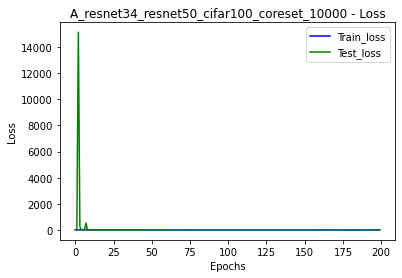

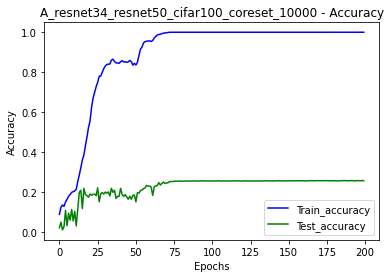

{'Victim': 'resnet50', 'Dataset': 'cifar100', 'QueryType': 'coreset', 'QuerySize': 10000, 'Queried Output': 'Labels', 'Attacker': 'resnet34', 'Train Loss': 0.0, 'Train Accuracy': 100.0, 'Test Loss': 14.4986, 'Test Accuracy': 25.8}
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
-----------------------Dataset: cifar100----------------------------
--------Victim: resnet50 Attacker: resnet34------------
---------------Query Type: coreset Query Size: 20000-------------------
Loading queried cifar100 dataset with resnet50 victim
    - input:50000 queried:50000
Sample using coreset with query size 20000
    - input:50000 sampled:20000
Total epochs: 100
epoch 1
    - train_acc 0.10355 train_loss 4.24974
    - test_acc  0.04910 test_loss  1231.65405
epoch 2
    - train_acc 0.11460 train_loss 3.97890
    - test_acc  0.02190 test_loss  9.31035
epoch 3
    - train_acc 0.12465 train_loss 3.6

    - test_acc  0.31620 test_loss  7.51674
epoch 80
    - train_acc 1.00000 train_loss 0.00009
    - test_acc  0.31570 test_loss  8.38088
epoch 81
    - train_acc 1.00000 train_loss 0.00005
    - test_acc  0.31640 test_loss  8.89524
epoch 82
    - train_acc 1.00000 train_loss 0.00005
    - test_acc  0.31590 test_loss  9.20293
epoch 83
    - train_acc 1.00000 train_loss 0.00005
    - test_acc  0.31560 test_loss  8.55337
epoch 84
    - train_acc 1.00000 train_loss 0.00005
    - test_acc  0.31500 test_loss  9.28354
epoch 85
    - train_acc 1.00000 train_loss 0.00006
    - test_acc  0.31690 test_loss  8.96923
epoch 86
    - train_acc 1.00000 train_loss 0.00006
    - test_acc  0.31550 test_loss  7.71191
epoch 87
    - train_acc 1.00000 train_loss 0.00005
    - test_acc  0.31560 test_loss  8.83811
epoch 88
    - train_acc 1.00000 train_loss 0.00004
    - test_acc  0.31520 test_loss  8.55726
epoch 89
    - train_acc 1.00000 train_loss 0.00008
    - test_acc  0.31460 test_loss  8.99048
epoch 9

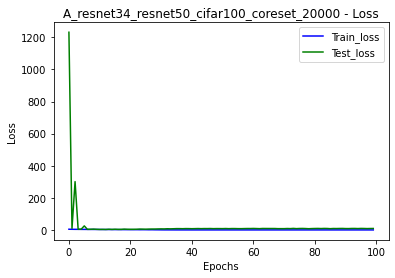

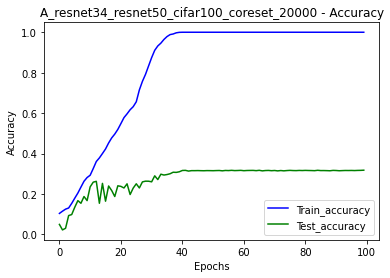

{'Victim': 'resnet50', 'Dataset': 'cifar100', 'QueryType': 'coreset', 'QuerySize': 20000, 'Queried Output': 'Labels', 'Attacker': 'resnet34', 'Train Loss': 0.0, 'Train Accuracy': 100.0, 'Test Loss': 8.9779, 'Test Accuracy': 31.74}
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
-----------------------Dataset: cifar100----------------------------
--------Victim: resnet50 Attacker: resnet34------------
---------------Query Type: coreset Query Size: 30000-------------------
Loading queried cifar100 dataset with resnet50 victim
    - input:50000 queried:50000
Sample using coreset with query size 30000
    - input:50000 sampled:30000
Total epochs: 66
epoch 1
    - train_acc 0.10677 train_loss 3.91260
    - test_acc  0.07780 test_loss  10.46355
epoch 2
    - train_acc 0.12440 train_loss 4.06812
    - test_acc  0.00570 test_loss  1201.16846
epoch 3
    - train_acc 0.12873 train_loss 3.5

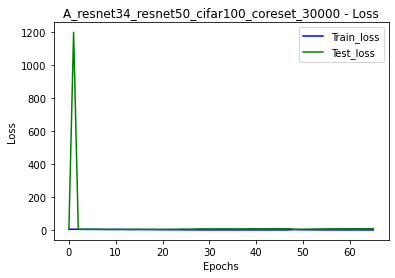

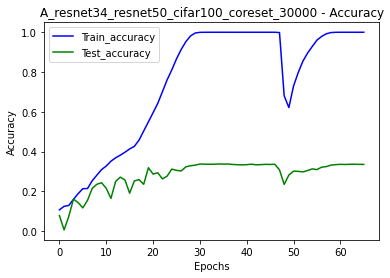

{'Victim': 'resnet50', 'Dataset': 'cifar100', 'QueryType': 'coreset', 'QuerySize': 30000, 'Queried Output': 'Labels', 'Attacker': 'resnet34', 'Train Loss': 0.0005, 'Train Accuracy': 100.0, 'Test Loss': 7.4337, 'Test Accuracy': 33.53}
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
-----------------------Dataset: cifar100----------------------------
--------Victim: resnet50 Attacker: resnet34------------
---------------Query Type: coreset Query Size: 40000-------------------
Loading queried cifar100 dataset with resnet50 victim
    - input:50000 queried:50000
Sample using coreset with query size 40000
    - input:50000 sampled:40000
Total epochs: 50
epoch 1
    - train_acc 0.11643 train_loss 3.97770
    - test_acc  0.00880 test_loss  198.64540
epoch 2
    - train_acc 0.14122 train_loss 3.67288
    - test_acc  0.06430 test_loss  4.46552
epoch 3
    - train_acc 0.18187 train_loss 3.

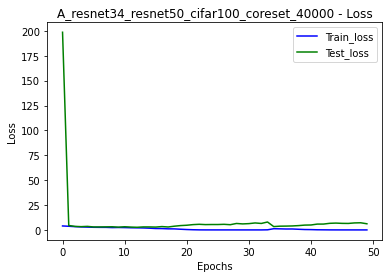

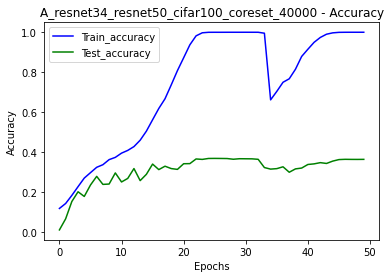

{'Victim': 'resnet50', 'Dataset': 'cifar100', 'QueryType': 'coreset', 'QuerySize': 40000, 'Queried Output': 'Labels', 'Attacker': 'resnet34', 'Train Loss': 0.0007, 'Train Accuracy': 100.0, 'Test Loss': 6.171, 'Test Accuracy': 36.26}
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
-----------------------Dataset: cifar100----------------------------
--------Victim: resnet50 Attacker: resnet34------------
---------------Query Type: coreset Query Size: 50000-------------------
Loading queried cifar100 dataset with resnet50 victim
    - input:50000 queried:50000
Sample using coreset with query size 50000
    - input:50000 sampled:50000
Total epochs: 40
epoch 1
    - train_acc 0.12552 train_loss 3.73192
    - test_acc  0.07090 test_loss  182.95598
epoch 2
    - train_acc 0.16482 train_loss 3.31811
    - test_acc  0.13650 test_loss  3.56751
epoch 3
    - train_acc 0.22054 train_loss 2.8

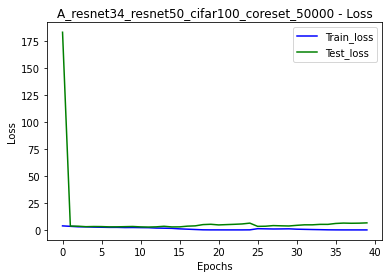

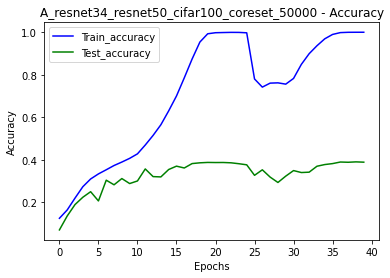

{'Victim': 'resnet50', 'Dataset': 'cifar100', 'QueryType': 'coreset', 'QuerySize': 50000, 'Queried Output': 'Labels', 'Attacker': 'resnet34', 'Train Loss': 0.0013, 'Train Accuracy': 100.0, 'Test Loss': 6.5193, 'Test Accuracy': 38.93}
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
-----------------------Dataset: cifar100----------------------------
--------Victim: resnet50 Attacker: resnet34------------
---------------Query Type: random Query Size: 10000-------------------
Loading queried cifar100 dataset with resnet50 victim
    - input:50000 queried:50000
Sample using random with query size 10000
    - input:50000 sampled:10000
Total epochs: 200
epoch 1
    - train_acc 0.08190 train_loss 4.03091
    - test_acc  0.05930 test_loss  4.82781
epoch 2
    - train_acc 0.12250 train_loss 3.78981
    - test_acc  0.10370 test_loss  10.32165
epoch 3
    - train_acc 0.13190 train_loss 4.05

    - train_acc 1.00000 train_loss 0.00012
    - test_acc  0.25760 test_loss  11.42276
epoch 80
    - train_acc 1.00000 train_loss 0.00004
    - test_acc  0.25830 test_loss  11.42999
epoch 81
    - train_acc 1.00000 train_loss 0.00006
    - test_acc  0.25820 test_loss  11.44620
epoch 82
    - train_acc 1.00000 train_loss 0.00007
    - test_acc  0.25900 test_loss  11.09771
epoch 83
    - train_acc 1.00000 train_loss 0.00003
    - test_acc  0.25800 test_loss  11.28084
epoch 84
    - train_acc 1.00000 train_loss 0.00009
    - test_acc  0.25800 test_loss  10.69784
epoch 85
    - train_acc 1.00000 train_loss 0.00006
    - test_acc  0.25780 test_loss  11.15647
epoch 86
    - train_acc 1.00000 train_loss 0.00004
    - test_acc  0.25910 test_loss  11.82339
epoch 87
    - train_acc 1.00000 train_loss 0.00007
    - test_acc  0.25820 test_loss  10.98414
epoch 88
    - train_acc 1.00000 train_loss 0.00004
    - test_acc  0.25820 test_loss  11.15698
epoch 89
    - train_acc 1.00000 train_loss 0.000

    - train_acc 1.00000 train_loss 0.00001
    - test_acc  0.26010 test_loss  11.84891
epoch 165
    - train_acc 1.00000 train_loss 0.00002
    - test_acc  0.25990 test_loss  11.56472
epoch 166
    - train_acc 1.00000 train_loss 0.00001
    - test_acc  0.26000 test_loss  11.50565
epoch 167
    - train_acc 1.00000 train_loss 0.00001
    - test_acc  0.25980 test_loss  10.63967
epoch 168
    - train_acc 1.00000 train_loss 0.00002
    - test_acc  0.26030 test_loss  10.95627
epoch 169
    - train_acc 1.00000 train_loss 0.00001
    - test_acc  0.25990 test_loss  10.85195
epoch 170
    - train_acc 1.00000 train_loss 0.00002
    - test_acc  0.25980 test_loss  11.30604
epoch 171
    - train_acc 1.00000 train_loss 0.00002
    - test_acc  0.26050 test_loss  11.83074
epoch 172
    - train_acc 1.00000 train_loss 0.00002
    - test_acc  0.25970 test_loss  11.10777
epoch 173
    - train_acc 1.00000 train_loss 0.00002
    - test_acc  0.25970 test_loss  10.85135
epoch 174
    - train_acc 1.00000 train_

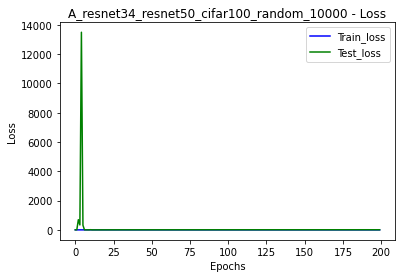

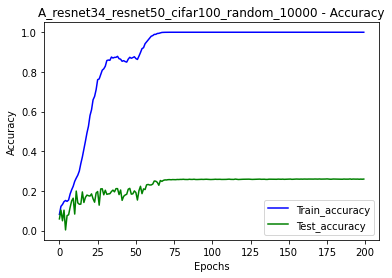

{'Victim': 'resnet50', 'Dataset': 'cifar100', 'QueryType': 'random', 'QuerySize': 10000, 'Queried Output': 'Labels', 'Attacker': 'resnet34', 'Train Loss': 0.0, 'Train Accuracy': 100.0, 'Test Loss': 11.0903, 'Test Accuracy': 26.0}
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
-----------------------Dataset: cifar100----------------------------
--------Victim: resnet50 Attacker: resnet34------------
---------------Query Type: random Query Size: 20000-------------------
Loading queried cifar100 dataset with resnet50 victim
    - input:50000 queried:50000
Sample using random with query size 20000
    - input:50000 sampled:20000
Total epochs: 100
epoch 1
    - train_acc 0.10535 train_loss 4.05475
    - test_acc  0.08460 test_loss  498.03165
epoch 2
    - train_acc 0.12275 train_loss 4.31462
    - test_acc  0.00730 test_loss  1076.51794
epoch 3
    - train_acc 0.12460 train_loss 3.89

    - test_acc  0.31160 test_loss  8.75603
epoch 80
    - train_acc 1.00000 train_loss 0.00012
    - test_acc  0.31270 test_loss  9.16117
epoch 81
    - train_acc 1.00000 train_loss 0.00009
    - test_acc  0.31270 test_loss  8.84894
epoch 82
    - train_acc 1.00000 train_loss 0.00005
    - test_acc  0.31210 test_loss  8.53514
epoch 83
    - train_acc 1.00000 train_loss 0.00007
    - test_acc  0.31190 test_loss  8.26770
epoch 84
    - train_acc 1.00000 train_loss 0.00008
    - test_acc  0.31230 test_loss  8.66515
epoch 85
    - train_acc 1.00000 train_loss 0.00006
    - test_acc  0.31230 test_loss  8.18445
epoch 86
    - train_acc 1.00000 train_loss 0.00005
    - test_acc  0.31270 test_loss  8.99550
epoch 87
    - train_acc 1.00000 train_loss 0.00008
    - test_acc  0.31270 test_loss  9.06017
epoch 88
    - train_acc 1.00000 train_loss 0.00007
    - test_acc  0.31270 test_loss  9.33123
epoch 89
    - train_acc 1.00000 train_loss 0.00008
    - test_acc  0.31270 test_loss  8.71150
epoch 9

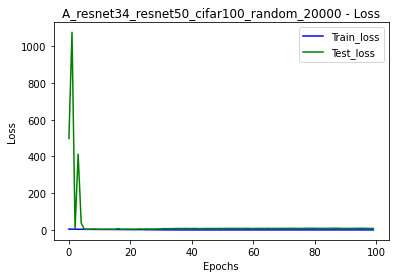

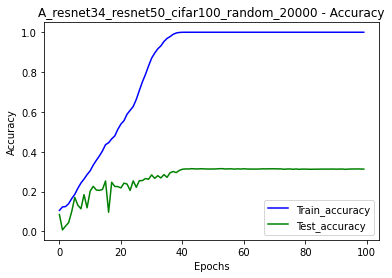

{'Victim': 'resnet50', 'Dataset': 'cifar100', 'QueryType': 'random', 'QuerySize': 20000, 'Queried Output': 'Labels', 'Attacker': 'resnet34', 'Train Loss': 0.0, 'Train Accuracy': 100.0, 'Test Loss': 8.1516, 'Test Accuracy': 31.28}
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
-----------------------Dataset: cifar100----------------------------
--------Victim: resnet50 Attacker: resnet34------------
---------------Query Type: random Query Size: 30000-------------------
Loading queried cifar100 dataset with resnet50 victim
    - input:50000 queried:50000
Sample using random with query size 30000
    - input:50000 sampled:30000
Total epochs: 66
epoch 1
    - train_acc 0.10503 train_loss 4.38774
    - test_acc  0.09730 test_loss  44.77562
epoch 2
    - train_acc 0.09783 train_loss 4.80655
    - test_acc  0.03180 test_loss  75.95974
epoch 3
    - train_acc 0.10333 train_loss 3.80781


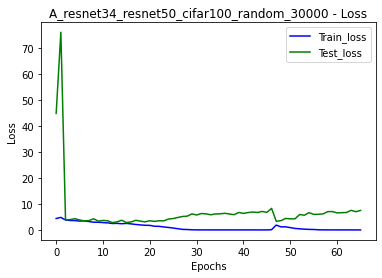

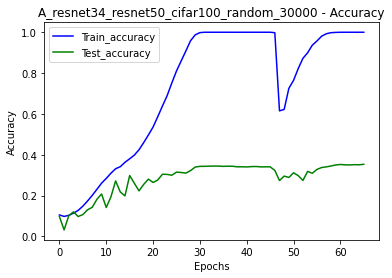

{'Victim': 'resnet50', 'Dataset': 'cifar100', 'QueryType': 'random', 'QuerySize': 30000, 'Queried Output': 'Labels', 'Attacker': 'resnet34', 'Train Loss': 0.0005, 'Train Accuracy': 100.0, 'Test Loss': 7.4888, 'Test Accuracy': 35.31}
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
-----------------------Dataset: cifar100----------------------------
--------Victim: resnet50 Attacker: resnet34------------
---------------Query Type: random Query Size: 40000-------------------
Loading queried cifar100 dataset with resnet50 victim
    - input:50000 queried:50000
Sample using random with query size 40000
    - input:50000 sampled:40000
Total epochs: 50
epoch 1
    - train_acc 0.10875 train_loss 4.41168
    - test_acc  0.10010 test_loss  9.51191
epoch 2
    - train_acc 0.14095 train_loss 3.99713
    - test_acc  0.03710 test_loss  4.88842
epoch 3
    - train_acc 0.14487 train_loss 3.50262

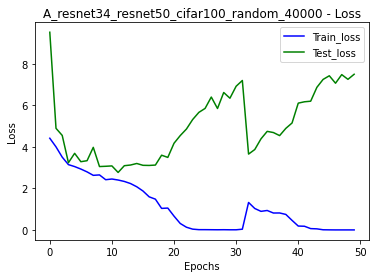

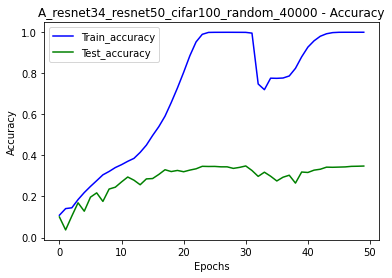

{'Victim': 'resnet50', 'Dataset': 'cifar100', 'QueryType': 'random', 'QuerySize': 40000, 'Queried Output': 'Labels', 'Attacker': 'resnet34', 'Train Loss': 0.0007, 'Train Accuracy': 100.0, 'Test Loss': 7.4906, 'Test Accuracy': 34.82}
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
-----------------------Dataset: cifar100----------------------------
--------Victim: resnet50 Attacker: resnet34------------
---------------Query Type: random Query Size: 50000-------------------
Loading queried cifar100 dataset with resnet50 victim
    - input:50000 queried:50000
Sample using random with query size 50000
    - input:50000 sampled:50000
Total epochs: 40
epoch 1
    - train_acc 0.11628 train_loss 4.05276
    - test_acc  0.01100 test_loss  588.43219
epoch 2
    - train_acc 0.15460 train_loss 3.30725
    - test_acc  0.12860 test_loss  4.04938
epoch 3
    - train_acc 0.21164 train_loss 2.991

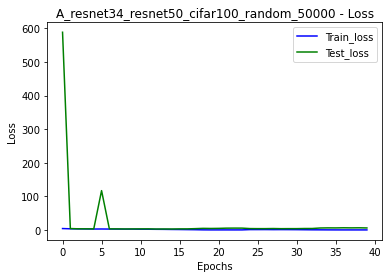

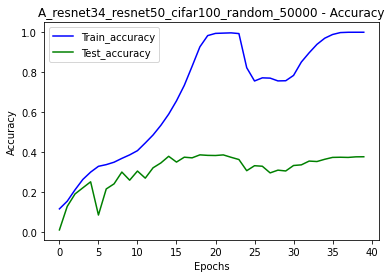

{'Victim': 'resnet50', 'Dataset': 'cifar100', 'QueryType': 'random', 'QuerySize': 50000, 'Queried Output': 'Labels', 'Attacker': 'resnet34', 'Train Loss': 0.0018, 'Train Accuracy': 100.0, 'Test Loss': 5.8542, 'Test Accuracy': 37.7}
-----------------------------------------------------------------------------


In [4]:
print(f'config={config}\n\nparameters={parameters}\n')
Results = []
# Iterate through Victim Model & Dataset
for victim in parameters["victim"]:
    print('---------------------------------------------------------------------------')
    # get dataset in dataloader
    trainloader, testloader, outputs = get_dataloader(victim["data"])

    # query test data
    querytestloader = query_victim(victim, outputs, testloader, len(testloader.dataset), train=False)

    # Iterate through Attacker Model
    for attacker_type in parameters["attacker"]:
        # Iterate Through Query Type
        for querytype in parameters["query_type"]:
            # Iterate Through Query Size
            for size in parameters["query_size"]:
                print('-----------------------------------------------------------------------------')
                print(f'-----------------------Dataset: {victim["data"]}----------------------------')
                print(f'--------Victim: {victim["model_name"]} Attacker: {attacker_type}------------')
                print(f'---------------Query Type: {querytype} Query Size: {size}-------------------')

                # query train data
                querytrainloader = query_victim(victim, outputs, trainloader, size, q_type=querytype)

                # initialize attacker model
                attacker = get_model(attacker_type, outputs)

                # train attacker model
                attacker_result = training(attacker, querytrainloader, querytestloader)

                # save & visualize model inference
                title = f'A_{attacker_type}_{victim["model_name"]}_{victim["data"]}_{querytype}_{size}'
                percent = save_visualize(attacker, attacker_result,title )
                results_dict={"Victim":victim["model_name"],
                                "Dataset":victim["data"],
                                "QueryType": querytype,
                                "QuerySize": size,
                                "Queried Output": 'Labels',
                                "Attacker": attacker_type,
                                "Train Loss": percent[0],
                                "Train Accuracy": percent[1],
                                "Test Loss": percent[2],
                                "Test Accuracy": percent[3]}

                print(results_dict)
                Results.append(results_dict)
                print('-----------------------------------------------------------------------------')

In [5]:
Results

[{'Victim': 'resnet50',
  'Dataset': 'cifar100',
  'QueryType': 'coreset',
  'QuerySize': 10000,
  'Queried Output': 'Labels',
  'Attacker': 'resnet34',
  'Train Loss': 0.0,
  'Train Accuracy': 100.0,
  'Test Loss': 14.4986,
  'Test Accuracy': 25.8},
 {'Victim': 'resnet50',
  'Dataset': 'cifar100',
  'QueryType': 'coreset',
  'QuerySize': 20000,
  'Queried Output': 'Labels',
  'Attacker': 'resnet34',
  'Train Loss': 0.0,
  'Train Accuracy': 100.0,
  'Test Loss': 8.9779,
  'Test Accuracy': 31.74},
 {'Victim': 'resnet50',
  'Dataset': 'cifar100',
  'QueryType': 'coreset',
  'QuerySize': 30000,
  'Queried Output': 'Labels',
  'Attacker': 'resnet34',
  'Train Loss': 0.0005,
  'Train Accuracy': 100.0,
  'Test Loss': 7.4337,
  'Test Accuracy': 33.53},
 {'Victim': 'resnet50',
  'Dataset': 'cifar100',
  'QueryType': 'coreset',
  'QuerySize': 40000,
  'Queried Output': 'Labels',
  'Attacker': 'resnet34',
  'Train Loss': 0.0007,
  'Train Accuracy': 100.0,
  'Test Loss': 6.171,
  'Test Accuracy':